# _Forecasting: Principles and Practice_ 3
Hyndman, Rob J. & George Athanasopoulos. (2021). _Forecasting: Principles and Practice_. 3rd Ed. OTexts. [Home](https://otexts.com/fpp3/).

---

```{admonition} Revised
14 Jun 2023
```
```{contents}
```

---

## Programming Environment

In [1]:
library(fpp3)
library(GGally)
library(latex2exp)

sessionInfo()

── Attaching packages ────────────────────────────────────────────── fpp3 0.5 ──

✔ tibble      3.2.1     ✔ tsibble     1.1.3
✔ dplyr       1.1.2     ✔ tsibbledata 0.4.1
✔ tidyr       1.3.0     ✔ feasts      0.3.1
✔ lubridate   1.9.2     ✔ fable       0.3.3
✔ ggplot2     3.4.2     ✔ fabletools  0.3.3

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



R version 4.3.0 (2023-04-21)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Ventura 13.3.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] latex2exp_0.9.6   GGally_2.1.2      fable_0.3.3       feasts_0.3.1     
 [5] fabletools_0.3.3  tsibbledata_0.4.1 tsibble_1.1.3     ggplot2_3.4.2    
 [9] lubridate_1.9.2   tidyr_1.3.0       dplyr_1.1.2       tibble_3.2.1     
[13] fpp3_0.5         

loaded via a namespace (and not attached):
 [1] rappdirs_0.3.3       utf8_1.2.3           generics_0.1.3      
 [4] anytime_0.3.9        stringi_1.7.12   

---

## 2 - Time series graphics

### 2.1 `tsibble` objects

[Time Series]

A time series can be thought of as a list of numbers (the measurements), along with some information about what times those numbers were recorded (the index). This information can be stored as a `tsibble` object in R.

[Tsibble]
* three components
  * index: time information about the observation
  * one or more keys: optional unique identifiers for each series
  * one or more measured variables: number of interest

`tsibble` objects extend tidy data frames (`tibble` objects) by introducing temporal structure.

A `tsibble` allows storage and manipulation of multiple time series in R.

A `tsibble` allos multiple time series to be stored in a single object.

For observations that are more frequent than once per year, we need to use a time class function on the index.
* `yearmonth`
* `start:end` annual
* `yearquarter()` quarterly
* `yearmonth()` monthly
* `yearweek()` weekly
* `as_date()`, `ymd()` daily
* `as_datetime()`, `ymd_hms()` sub daily

In [2]:
head(tsibbledata::global_economy)

Country     Code Year GDP        Growth CPI Imports   Exports   Population
1 Afghanistan AFG  1960  537777811 NA     NA   7.024793  4.132233 8996351   
2 Afghanistan AFG  1961  548888896 NA     NA   8.097166  4.453443 9166764   
3 Afghanistan AFG  1962  546666678 NA     NA   9.349593  4.878051 9345868   
4 Afghanistan AFG  1963  751111191 NA     NA  16.863910  9.171601 9533954   
5 Afghanistan AFG  1964  800000044 NA     NA  18.055555  8.888893 9731361   
6 Afghanistan AFG  1965 1006666638 NA     NA  21.412803 11.258279 9938414

In [3]:
head(tsibble::tourism)

Quarter Region   State           Purpose  Trips   
1 1998 Q1 Adelaide South Australia Business 135.0777
2 1998 Q2 Adelaide South Australia Business 109.9873
3 1998 Q3 Adelaide South Australia Business 166.0347
4 1998 Q4 Adelaide South Australia Business 127.1605
5 1999 Q1 Adelaide South Australia Business 137.4485
6 1999 Q2 Adelaide South Australia Business 199.9126

In [4]:
y <- tsibble(
  Year        = 2015:2019,
  Observation = c(123, 39, 78, 52, 110),
  index       = Year
)
y

Year Observation
1 2015 123        
2 2016  39        
3 2017  78        
4 2018  52        
5 2019 110

In [5]:
z <- tibble(
  Month       = c('2019 Jan', '2019 Feb', '2019 Mar', '2019 Apr', '2019 May'),
  Observation = c(50, 23, 34, 30, 25)
)
z

z %>%
  mutate(Month = yearmonth(Month)) %>%
  as_tsibble(index = Month)

Month    Observation
1 2019 Jan 50         
2 2019 Feb 23         
3 2019 Mar 34         
4 2019 Apr 30         
5 2019 May 25

Month    Observation
1 2019 Jan 50         
2 2019 Feb 23         
3 2019 Mar 34         
4 2019 Apr 30         
5 2019 May 25

In [6]:
tsibbledata::olympic_running %>%
  head()

tsibbledata::olympic_running %>%
  distinct(Length, Sex) %>%
  head()

Year Length Sex Time
1 1896 100    men 12.0
2 1900 100    men 11.0
3 1904 100    men 11.0
4 1908 100    men 10.8
5 1912 100    men 10.8
6 1916 100    men   NA

Length Sex  
1 100    men  
2 100    women
3 200    men  
4 200    women
5 400    men  
6 400    women

In [7]:
tsibbledata::PBS %>%
  head()

tsibbledata::PBS %>%
  filter(ATC2 == 'A10') %>%
  head()

tsibbledata::PBS %>%
  filter(ATC2 == 'A10') %>%
  select(Month, Concession, Type, Cost) %>%
  head()

tsibbledata::PBS %>%
  filter(ATC2 == 'A10') %>%
  select(Month, Concession, Type, Cost) %>%
  summarize(TotalC = sum(Cost)) %>%
  head()

tsibbledata::PBS %>%
  filter(ATC2 == 'A10') %>%
  select(Month, Concession, Type, Cost) %>%
  summarize(TotalC = sum(Cost)) %>%
  mutate(Cost = TotalC / 1e6) %>%
  head()

a10 <- tsibbledata::PBS %>%
  filter(ATC2 == 'A10') %>%
  select(Month, Concession, Type, Cost) %>%
  summarize(TotalC = sum(Cost)) %>%
  mutate(Cost = TotalC / 1e6)

Month    Concession   Type        ATC1 ATC1_desc                       ATC2
1 1991 Jul Concessional Co-payments A    Alimentary tract and metabolism A01 
2 1991 Aug Concessional Co-payments A    Alimentary tract and metabolism A01 
3 1991 Sep Concessional Co-payments A    Alimentary tract and metabolism A01 
4 1991 Oct Concessional Co-payments A    Alimentary tract and metabolism A01 
5 1991 Nov Concessional Co-payments A    Alimentary tract and metabolism A01 
6 1991 Dec Concessional Co-payments A    Alimentary tract and metabolism A01 
  ATC2_desc                   Scripts Cost 
1 STOMATOLOGICAL PREPARATIONS 18228   67877
2 STOMATOLOGICAL PREPARATIONS 15327   57011
3 STOMATOLOGICAL PREPARATIONS 14775   55020
4 STOMATOLOGICAL PREPARATIONS 15380   57222
5 STOMATOLOGICAL PREPARATIONS 14371   52120
6 STOMATOLOGICAL PREPARATIONS 15028   54299

Month    Concession   Type        ATC1 ATC1_desc                       ATC2
1 1991 Jul Concessional Co-payments A    Alimentary tract and metabolism A10 
2 1991 Aug Concessional Co-payments A    Alimentary tract and metabolism A10 
3 1991 Sep Concessional Co-payments A    Alimentary tract and metabolism A10 
4 1991 Oct Concessional Co-payments A    Alimentary tract and metabolism A10 
5 1991 Nov Concessional Co-payments A    Alimentary tract and metabolism A10 
6 1991 Dec Concessional Co-payments A    Alimentary tract and metabolism A10 
  ATC2_desc            Scripts Cost   
1 ANTIDIABETIC THERAPY 89733   2092878
2 ANTIDIABETIC THERAPY 77101   1795733
3 ANTIDIABETIC THERAPY 76255   1777231
4 ANTIDIABETIC THERAPY 78681   1848507
5 ANTIDIABETIC THERAPY 70554   1686458
6 ANTIDIABETIC THERAPY 75814   1843079

Month    Concession   Type        Cost   
1 1991 Jul Concessional Co-payments 2092878
2 1991 Aug Concessional Co-payments 1795733
3 1991 Sep Concessional Co-payments 1777231
4 1991 Oct Concessional Co-payments 1848507
5 1991 Nov Concessional Co-payments 1686458
6 1991 Dec Concessional Co-payments 1843079

Month    TotalC 
1 1991 Jul 3526591
2 1991 Aug 3180891
3 1991 Sep 3252221
4 1991 Oct 3611003
5 1991 Nov 3565869
6 1991 Dec 4306371

Month    TotalC  Cost    
1 1991 Jul 3526591 3.526591
2 1991 Aug 3180891 3.180891
3 1991 Sep 3252221 3.252221
4 1991 Oct 3611003 3.611003
5 1991 Nov 3565869 3.565869
6 1991 Dec 4306371 4.306371

In [8]:
prison <- readr::read_csv('https://OTexts.com/fpp3/extrafiles/prison_population.csv')
prison <- prison %>%
  mutate(Quarter = yearquarter(Date)) %>%
  select(-Date) %>%
  as_tsibble(key = c(State, Gender, Legal, Indigenous), index = Quarter)
head(prison)

Rows: 3072 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): State, Gender, Legal, Indigenous
dbl  (1): Count
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


State Gender Legal    Indigenous Count Quarter
1 ACT   Female Remanded ATSI       0     2005 Q1
2 ACT   Female Remanded ATSI       1     2005 Q2
3 ACT   Female Remanded ATSI       0     2005 Q3
4 ACT   Female Remanded ATSI       0     2005 Q4
5 ACT   Female Remanded ATSI       1     2006 Q1
6 ACT   Female Remanded ATSI       1     2006 Q2

### 2.2 Time plots

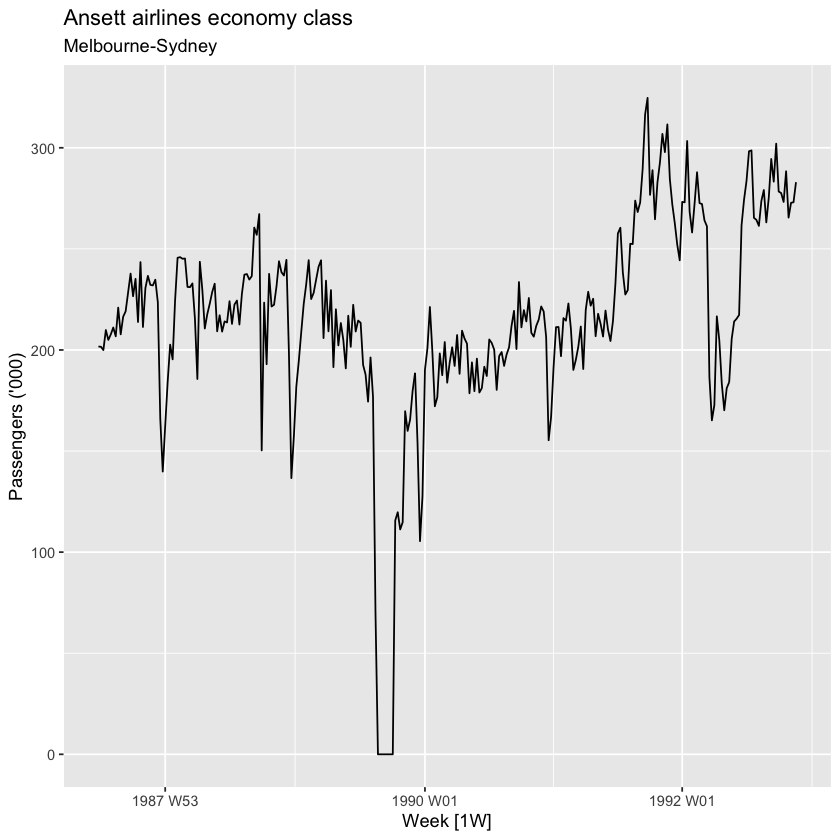

In [9]:
melsyd_economy <- tsibbledata::ansett %>%
  filter(Airports == 'MEL-SYD', Class == 'Economy') %>%
  mutate(Passengers = Passengers / 100)

autoplot(melsyd_economy, Passengers) +
  labs(
    title    = "Ansett airlines economy class",
    subtitle = 'Melbourne-Sydney',
    y        = "Passengers ('000)"
  )

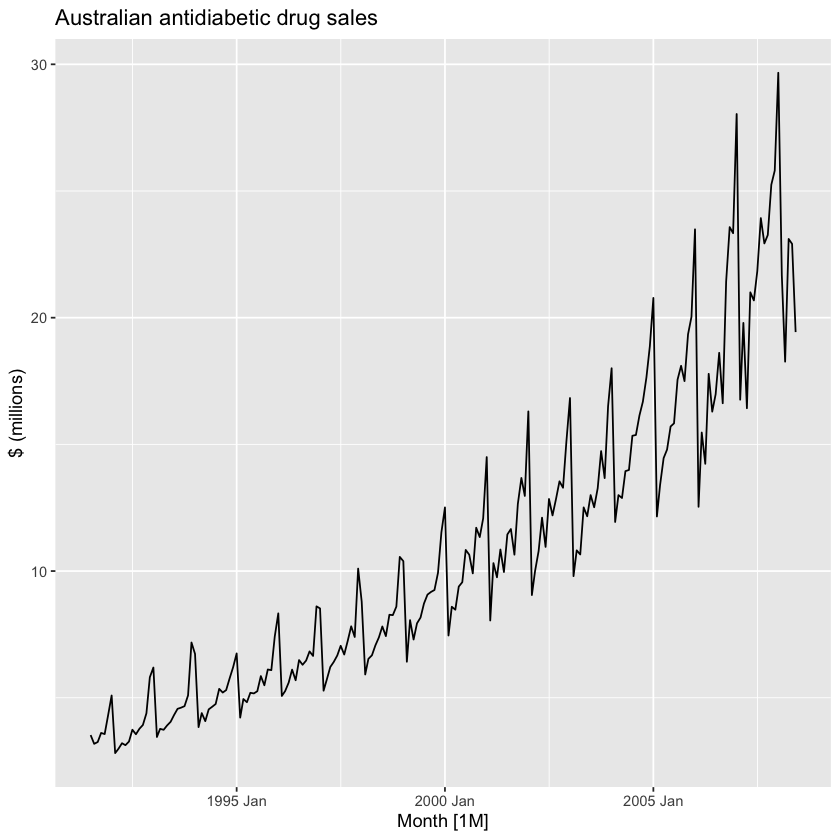

In [10]:
autoplot(a10, Cost) +
  labs(
    y     = '$ (millions)',
    title = 'Australian antidiabetic drug sales'
  )

### 2.4 Seasonal plots

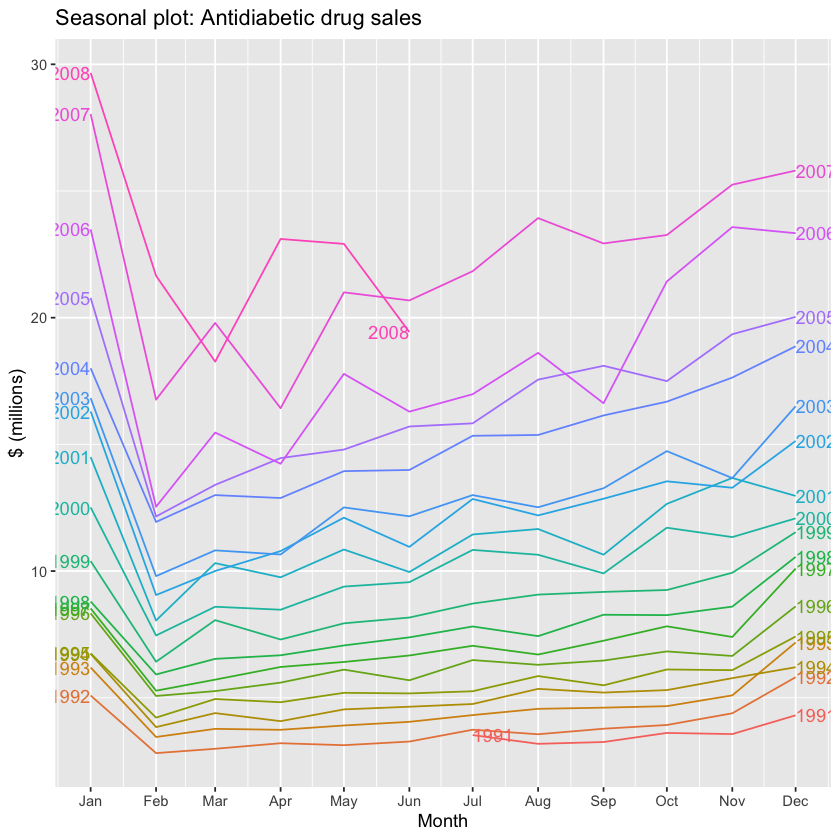

In [11]:
a10 %>%
  gg_season(Cost, labels = 'both') +
    labs(
      y     = '$ (millions)',
      title = 'Seasonal plot: Antidiabetic drug sales'
    )

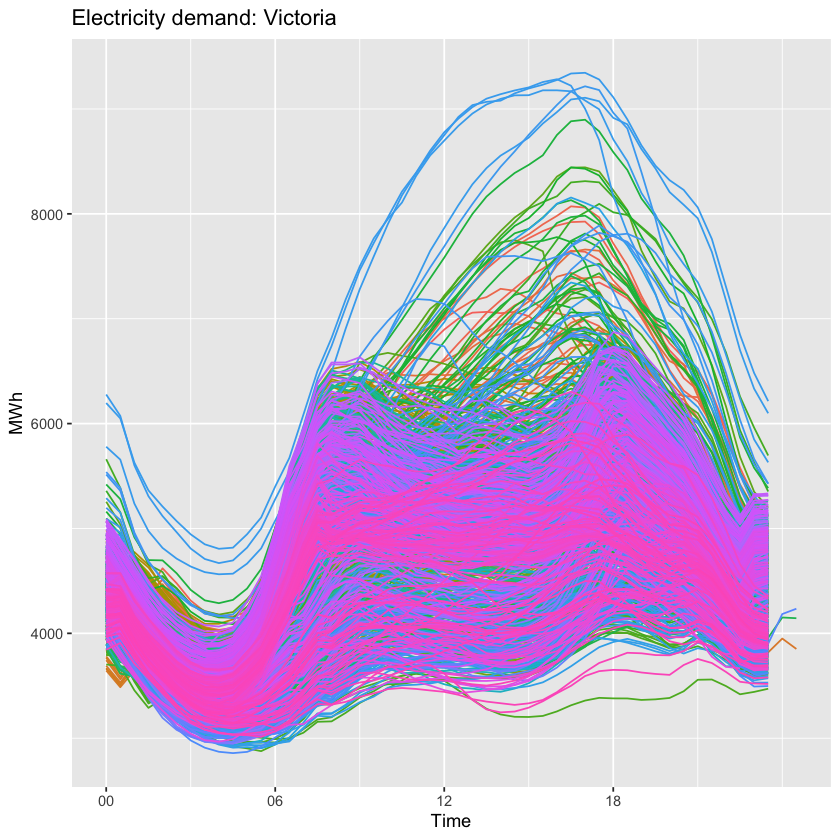

In [12]:
tsibbledata::vic_elec %>%
  gg_season(Demand, period = 'day') +
    theme(legend.position = 'none') +
    labs(
      y     = 'MWh',
      title = 'Electricity demand: Victoria'
    )

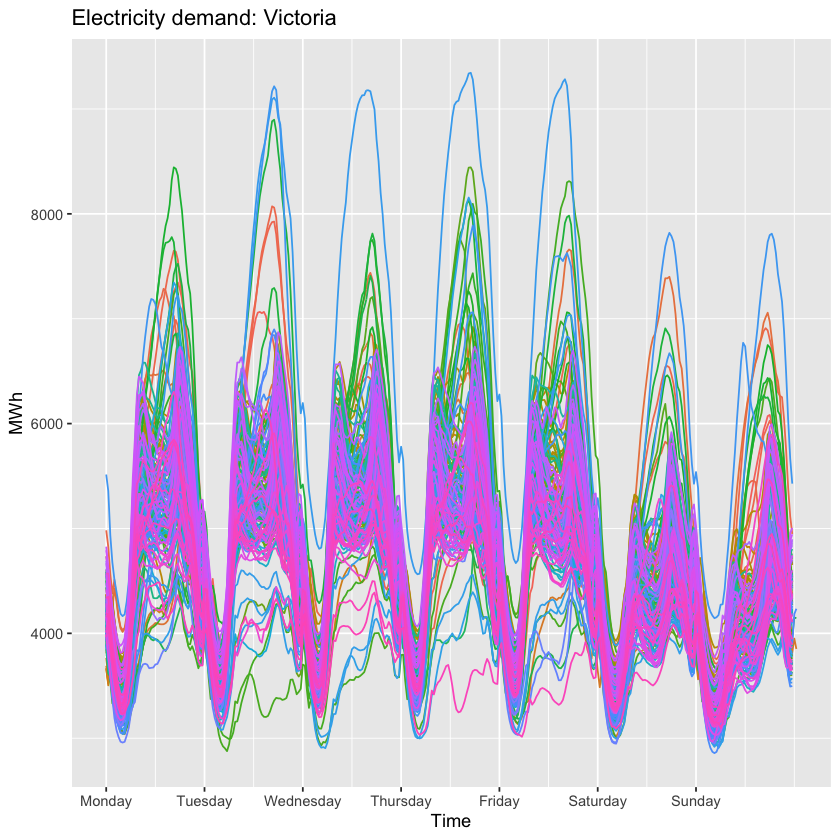

In [13]:
tsibbledata::vic_elec %>%
  gg_season(Demand, period = 'week') +
    theme(legend.position = 'none') +
    labs(
      y     = 'MWh',
      title = 'Electricity demand: Victoria'
    )

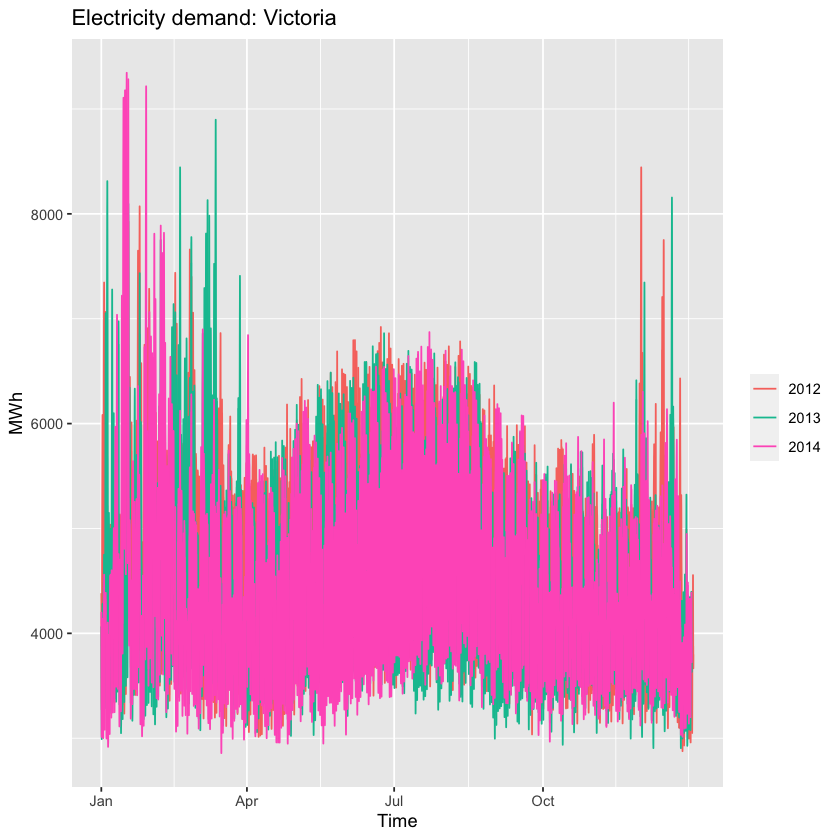

In [14]:
tsibbledata::vic_elec %>%
  gg_season(Demand, period = 'year') +
    labs(
      y     = 'MWh',
      title = 'Electricity demand: Victoria'
    )

### 2.5 Seasonal subseries plots

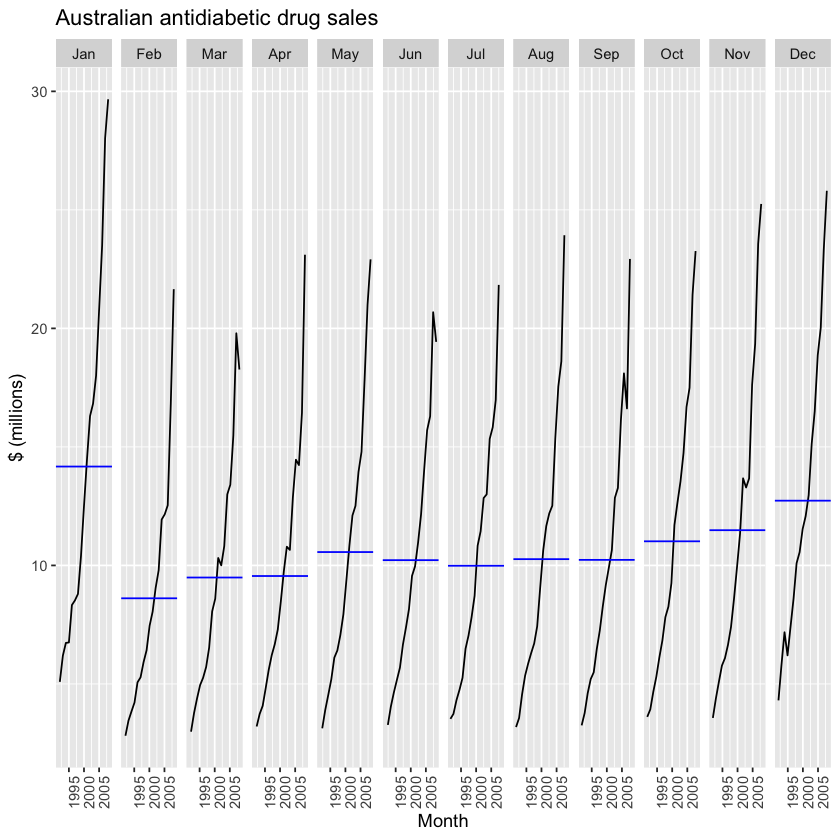

In [15]:
a10 %>%
  gg_subseries(Cost) +
    labs(
      y     = '$ (millions)',
      title = 'Australian antidiabetic drug sales'
    )

In [16]:
holidays <- tsibble::tourism %>%
  filter(Purpose == 'Holiday') %>%
  group_by(State) %>%
  summarize(Trips = sum(Trips))
head(holidays)

State Quarter Trips   
1 ACT   1998 Q1 196.2186
2 ACT   1998 Q2 126.7706
3 ACT   1998 Q3 110.6796
4 ACT   1998 Q4 170.4722
5 ACT   1999 Q1 107.7792
6 ACT   1999 Q2 124.6442

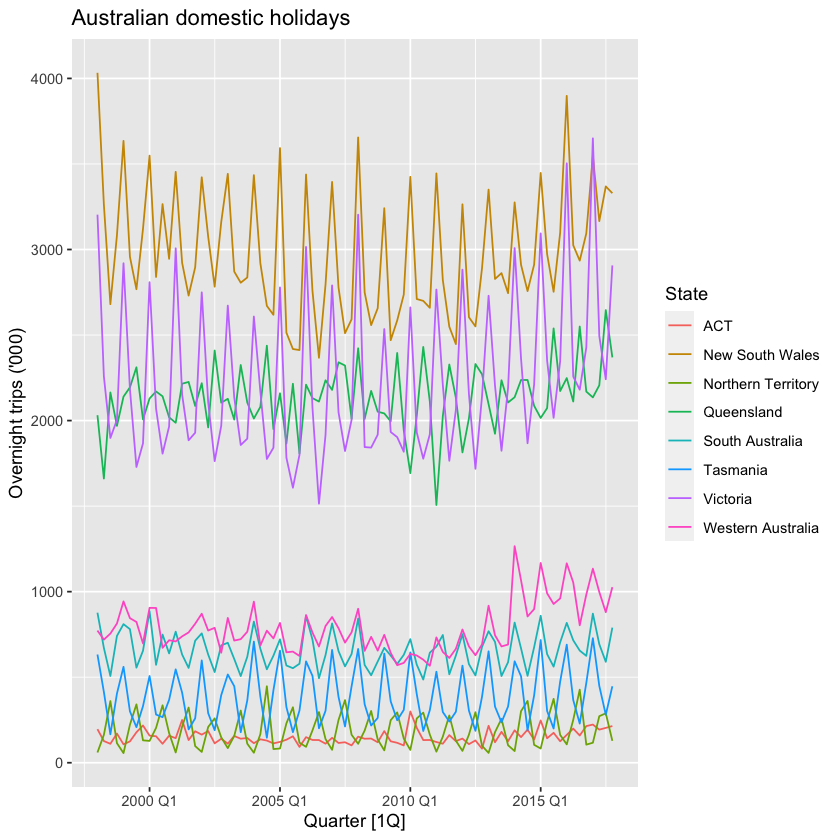

In [17]:
autoplot(holidays, Trips) +
  labs(
    y     = "Overnight trips ('000)",
    title = 'Australian domestic holidays'
  )

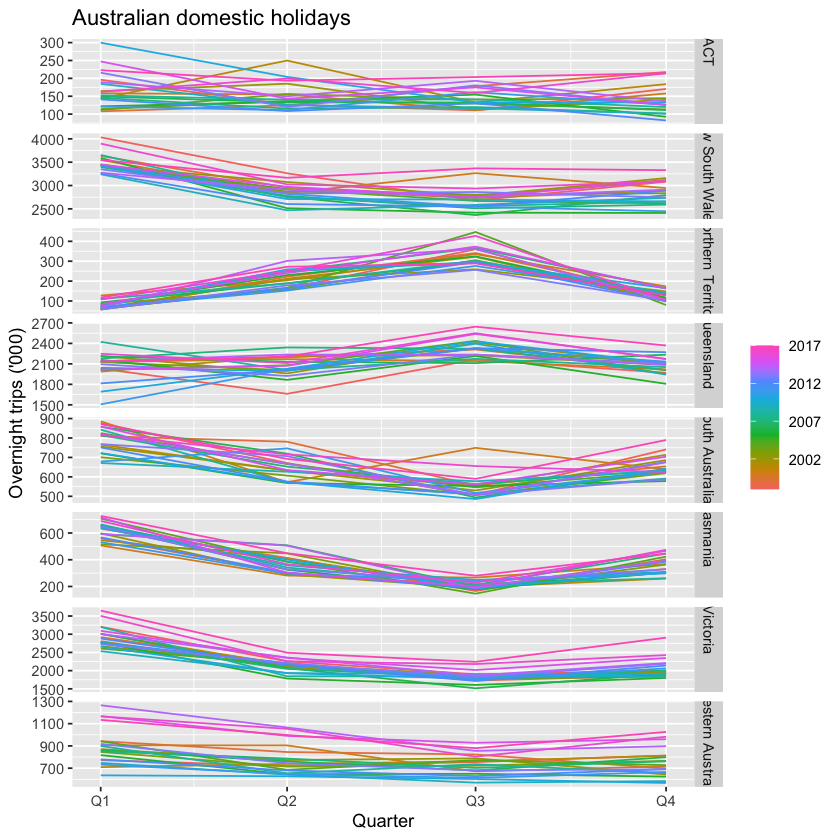

In [18]:
gg_season(holidays, Trips) +
  labs(
    y     = "Overnight trips ('000)",
    title = 'Australian domestic holidays'
  )

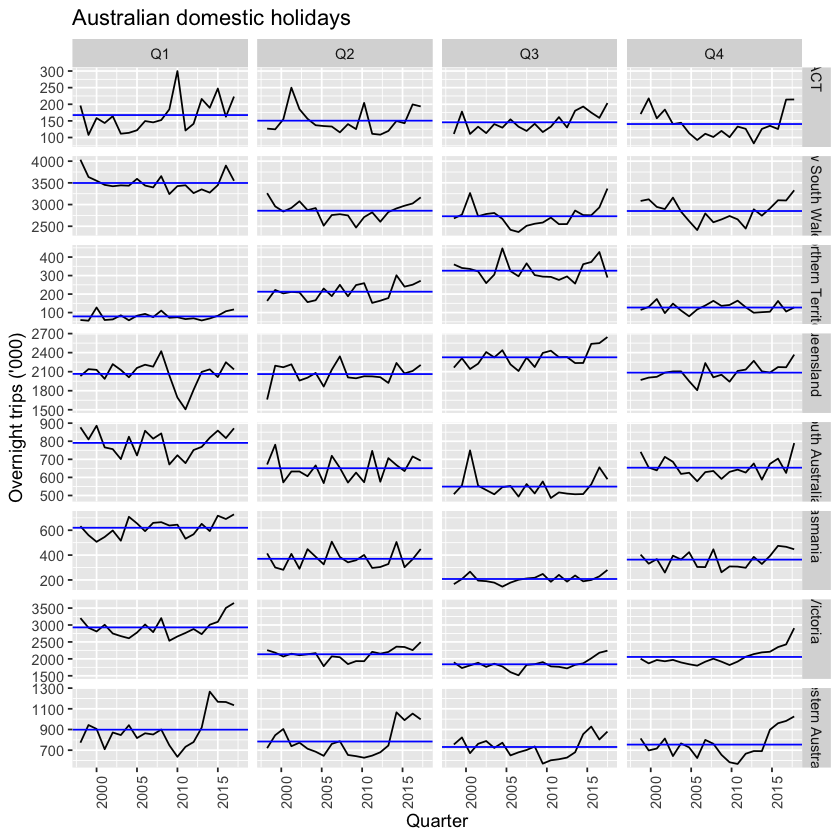

In [19]:
gg_subseries(holidays, Trips) +
  labs(
    y     = "Overnight trips ('000)",
    title = 'Australian domestic holidays'
  )

### 2.6 Scatterplots

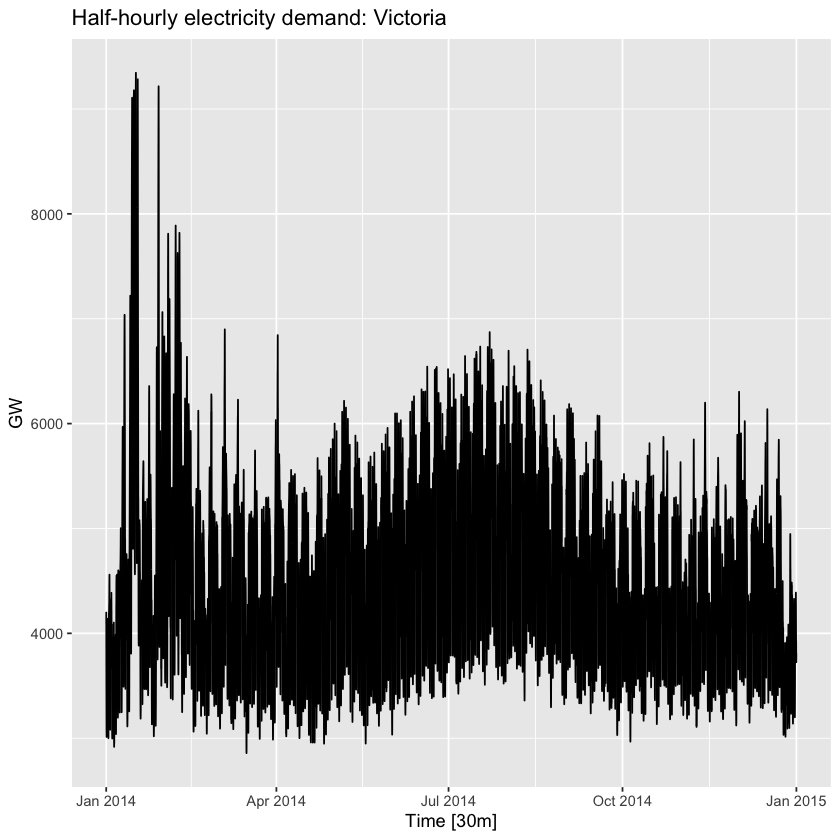

In [20]:
tsibbledata::vic_elec %>%
  filter(year(Time) == 2014) %>%
  autoplot(Demand) +
    labs(
      y     = 'GW',
      title = 'Half-hourly electricity demand: Victoria'
    )

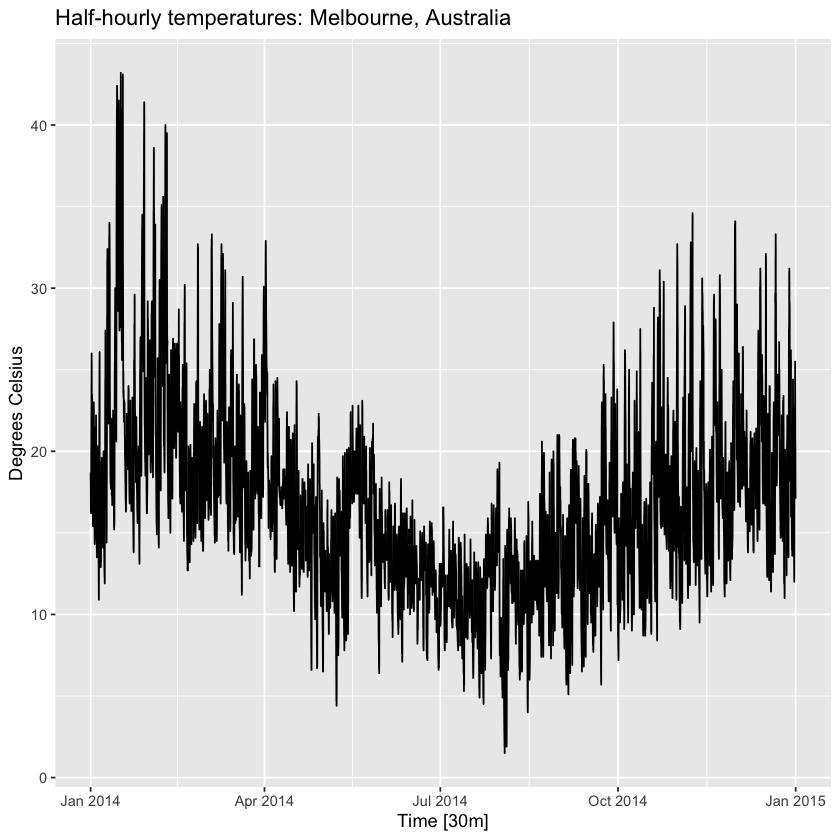

In [21]:
tsibbledata::vic_elec %>%
  filter(year(Time) == 2014) %>%
  autoplot(Temperature) +
    labs(
      y     = 'Degrees Celsius',
      title = 'Half-hourly temperatures: Melbourne, Australia'
    )

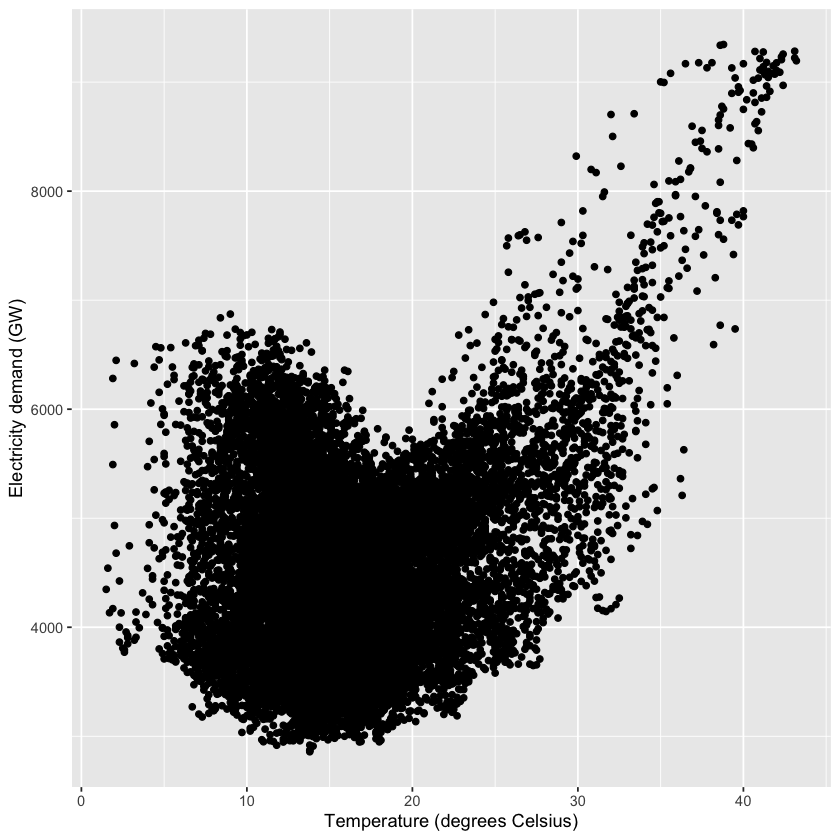

In [22]:
tsibbledata::vic_elec %>%
  filter(year(Time) == 2014) %>%
  ggplot(aes(x = Temperature, y = Demand)) +
    geom_point() +
    labs(
      x = 'Temperature (degrees Celsius)',
      y = 'Electricity demand (GW)'
    )

In [23]:
visitors <- tsibble::tourism %>%
  group_by(State) %>%
  summarize(Trips = sum(Trips))

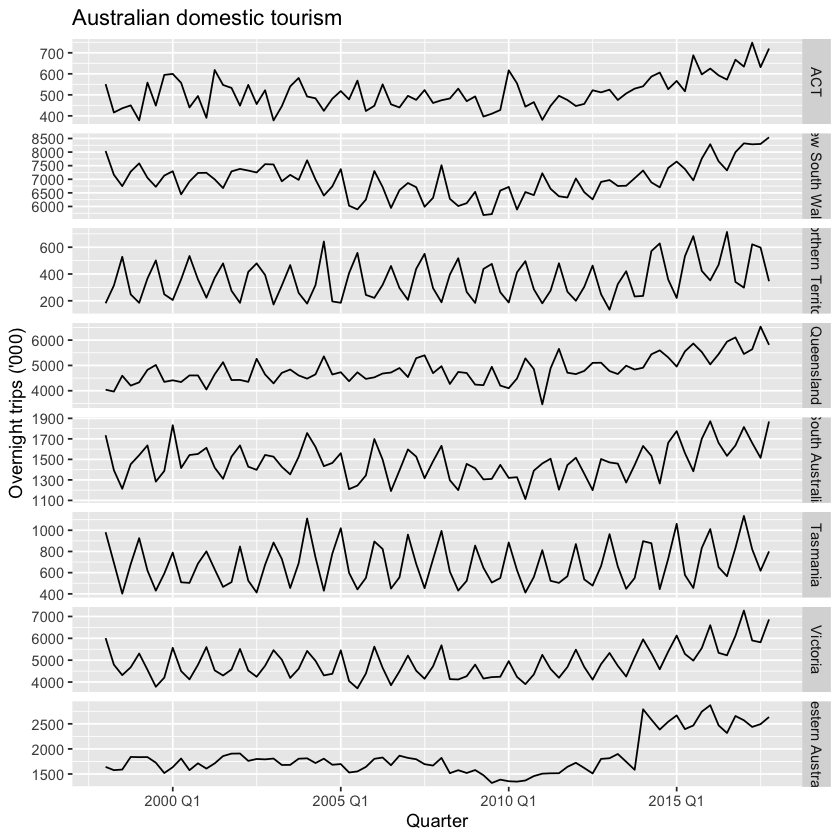

In [24]:
visitors %>%
  ggplot(aes(x = Quarter, y = Trips)) +
    geom_line() +
    facet_grid(vars(State), scales = 'free_y') +
    labs(
      title = 'Australian domestic tourism',
      y     = "Overnight trips ('000)"
    )

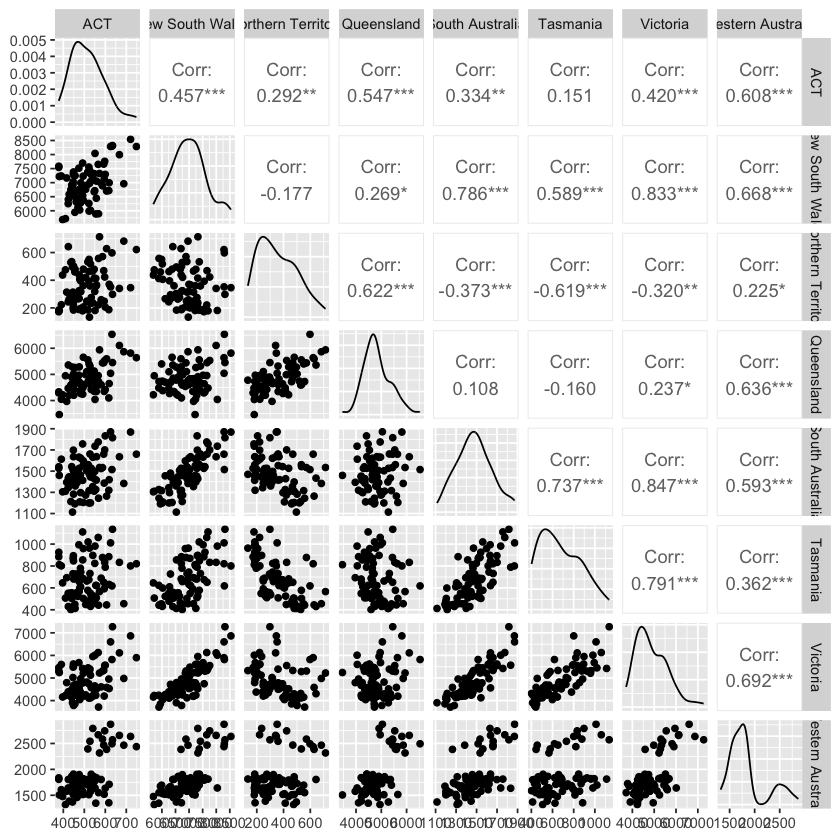

In [25]:
visitors %>%
  pivot_wider(values_from = Trips, names_from = State) %>%
  GGally::ggpairs(columns = 2:9)

### 2.7 Lag plots

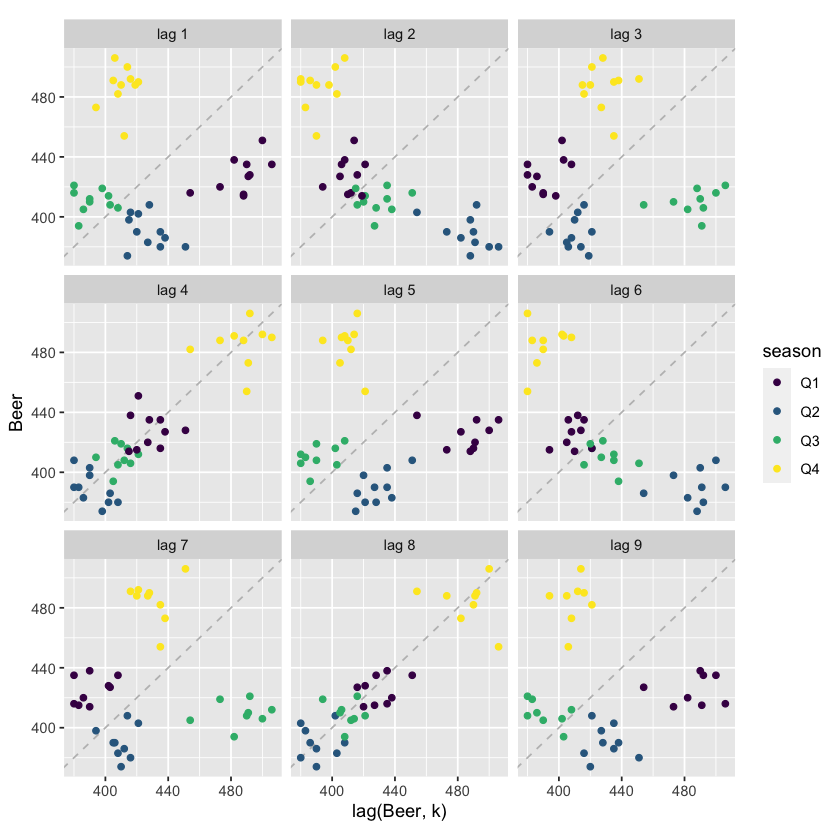

In [26]:
recent_production <- tsibbledata::aus_production %>%
  filter(year(Quarter) >= 2000)
recent_production %>%
  gg_lag(Beer, geom = 'point') +
    labs(
      x = 'lag(Beer, k)'
    )

### 2.8 Autocorrelation

In [27]:
recent_production %>%
  ACF(Beer, lag_max = 9)

lag acf         
1 1Q  -0.052981076
2 2Q  -0.758175440
3 3Q  -0.026233757
4 4Q   0.802204530
5 5Q  -0.077471204
6 6Q  -0.657451271
7 7Q   0.001194922
8 8Q   0.707254078
9 9Q  -0.088756255

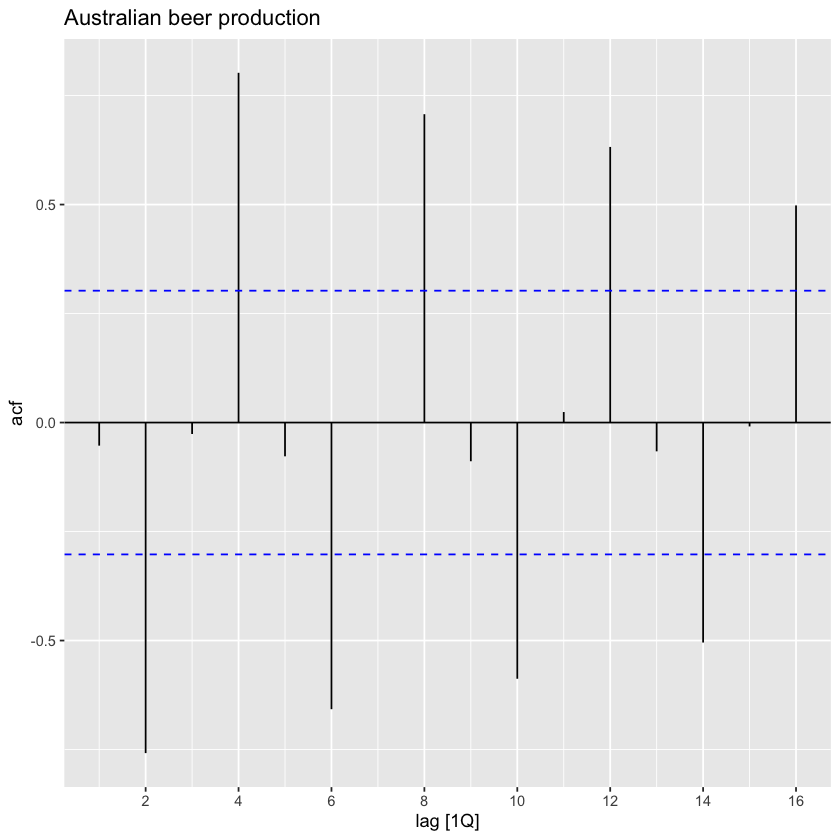

In [28]:
recent_production %>%
  ACF(Beer) %>%
  autoplot() +
    labs(
      title = 'Australian beer production'
    )

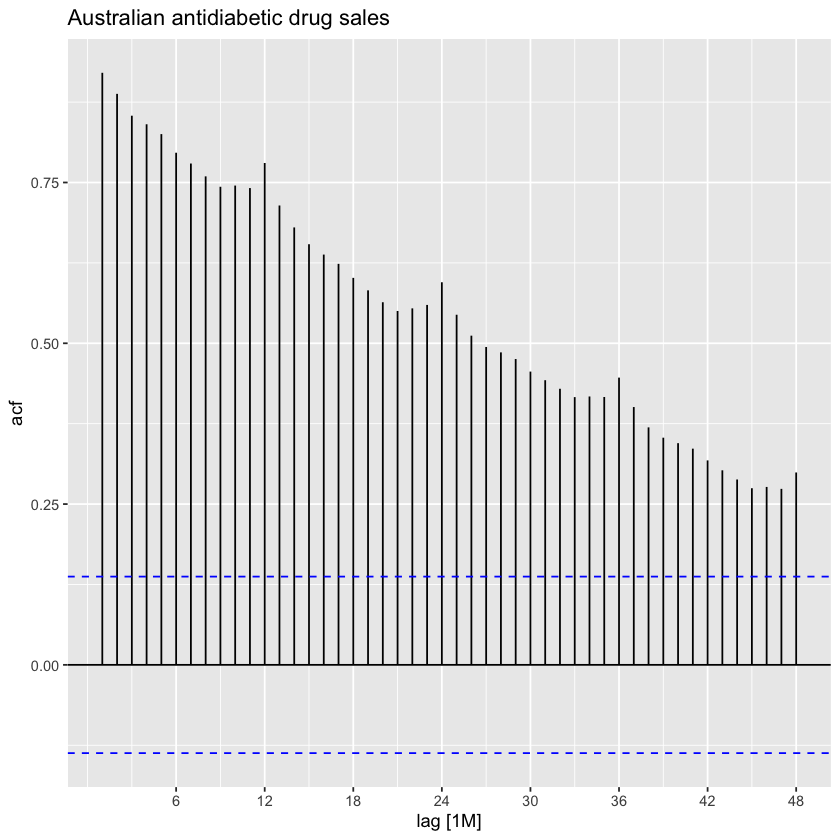

In [29]:
a10 %>%
  ACF(Cost, lag_max = 48) %>%
  autoplot() +
    labs(
      title = 'Australian antidiabetic drug sales'
    )

### 2.9 White noise

In [30]:
set.seed(30)

y <- tsibble(
  sample = 1:50,
  wn     = rnorm(50),
  index  = sample
)

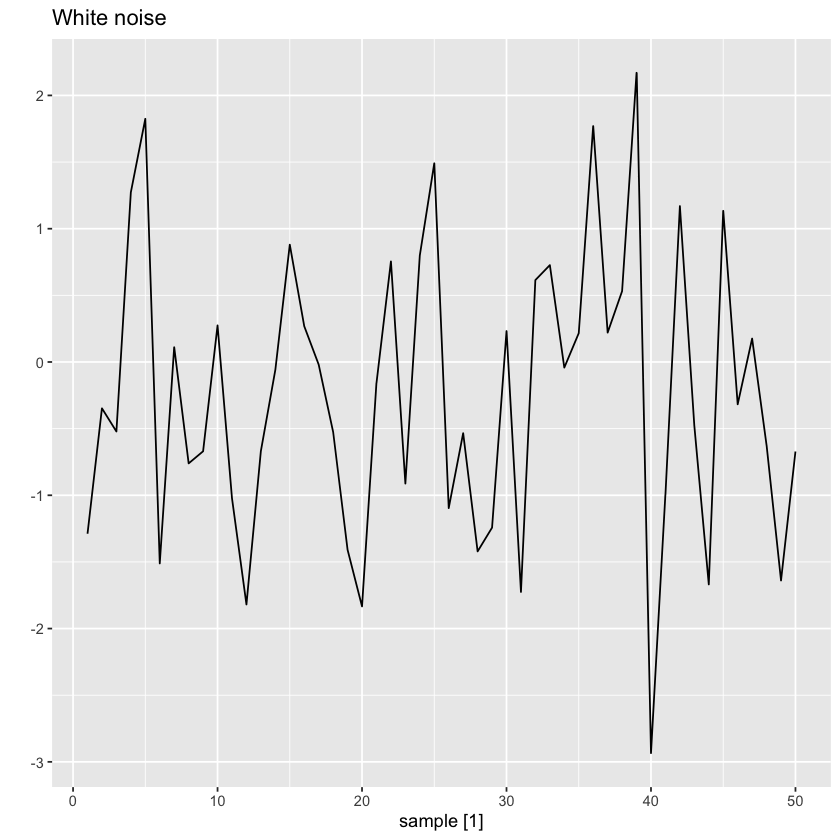

In [31]:
y %>%
  autoplot(wn) +
    labs(
      title = 'White noise',
      y     = ''
    )

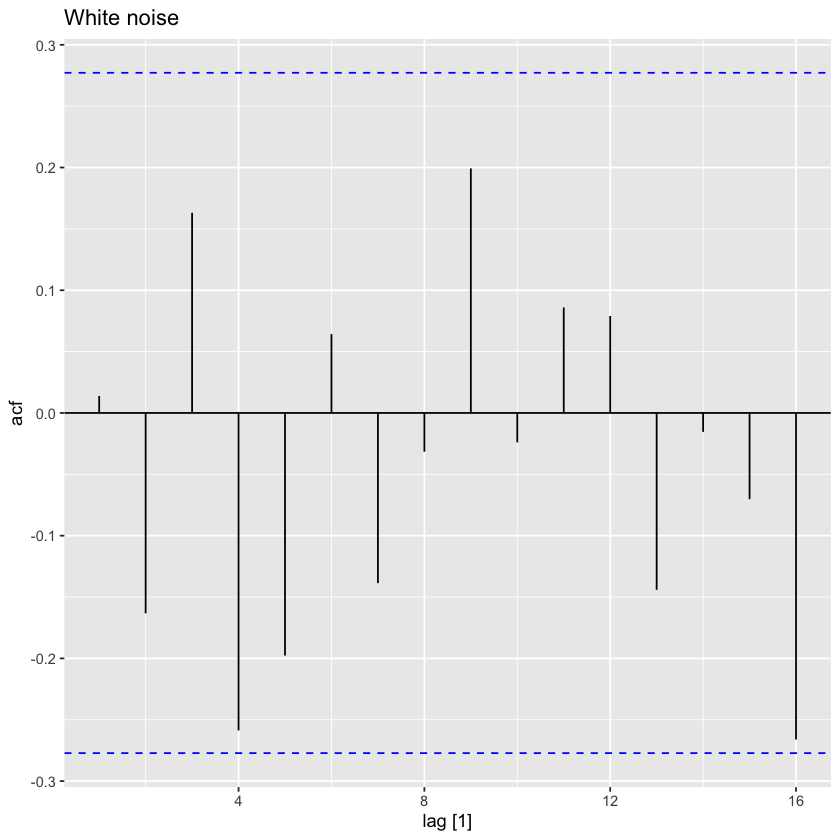

In [32]:
y %>%
  ACF(wn) %>%
  autoplot() +
    labs(
      title = 'White noise'
    )

## 3 - Time series decomposition

### 3.1 Transformations and adjustments

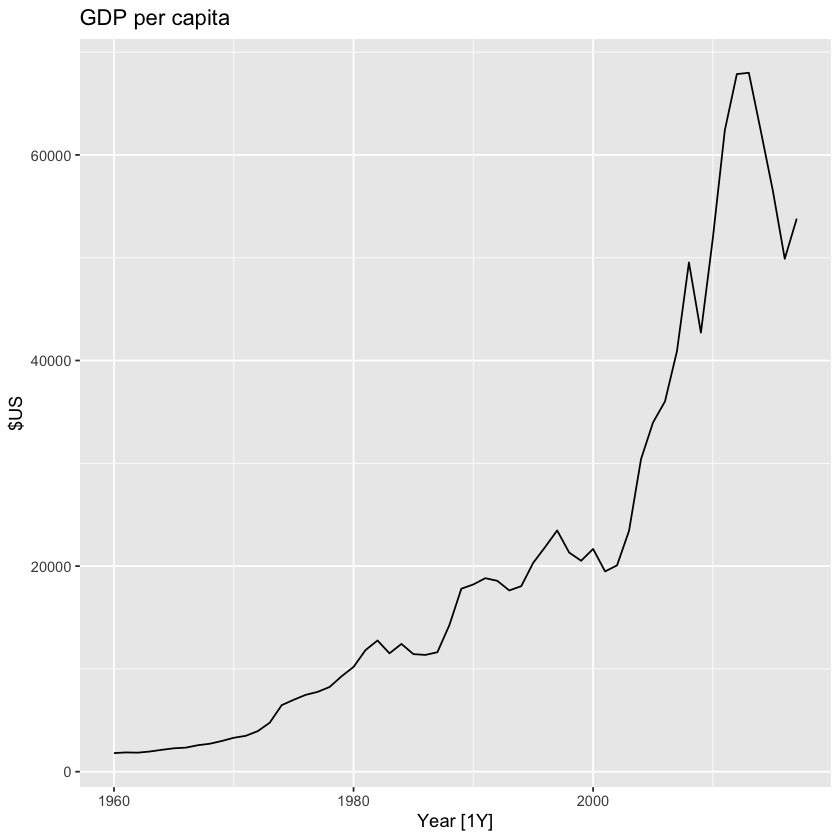

In [33]:
tsibbledata::global_economy %>%
  filter(Country == 'Australia') %>%
  autoplot(GDP/Population) +
    labs(
      title = 'GDP per capita',
      y     = '$US'
    )

In [34]:
print_retail <- tsibbledata::aus_retail %>%
  filter(Industry == 'Newspaper and book retailing') %>%
  group_by(Industry) %>%
  index_by(Year = year(Month)) %>%
  summarize(Turnover = sum(Turnover))
  
aus_economy <- tsibbledata::global_economy %>%
  filter(Code == 'AUS')

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


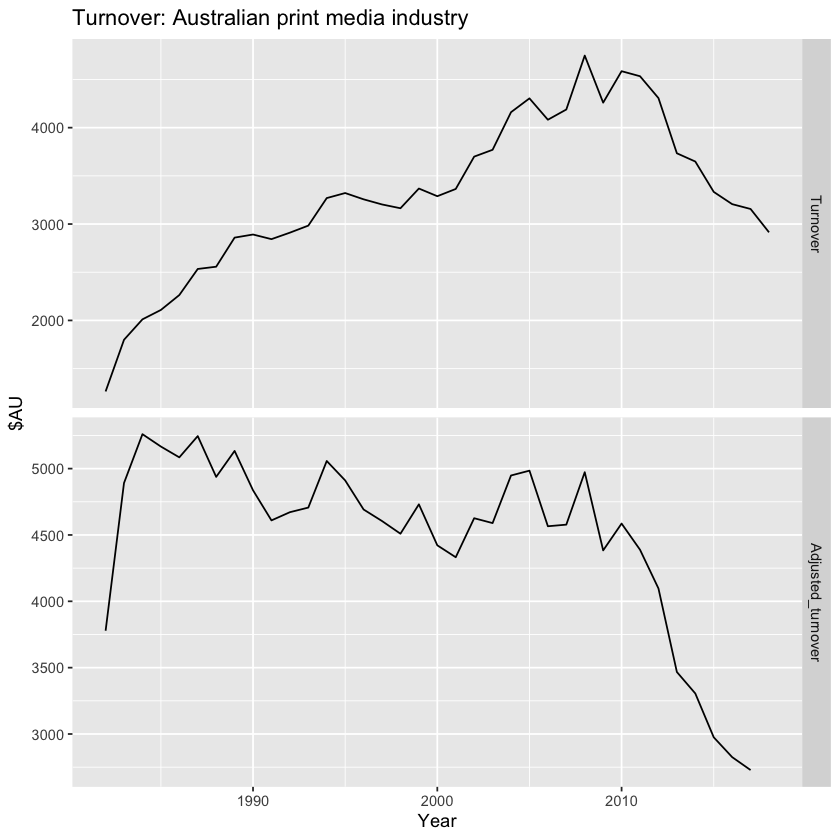

In [35]:
print_retail %>%
  left_join(aus_economy, by = 'Year') %>%
  mutate(Adjusted_turnover = Turnover / CPI * 100) %>%
  pivot_longer(c(Turnover, Adjusted_turnover), values_to = 'Turnover') %>%
  mutate(name = factor(name, levels = c('Turnover', 'Adjusted_turnover'))) %>%
  ggplot(aes(x = Year, y = Turnover)) +
    geom_line() +
    facet_grid(name ~ ., scales = 'free_y') +
    labs(
      title = 'Turnover: Australian print media industry',
      y     = '$AU'
    )

In [36]:
lambda <- tsibbledata::aus_production %>%
  features(Gas, features = guerrero) %>%
  pull(lambda_guerrero)

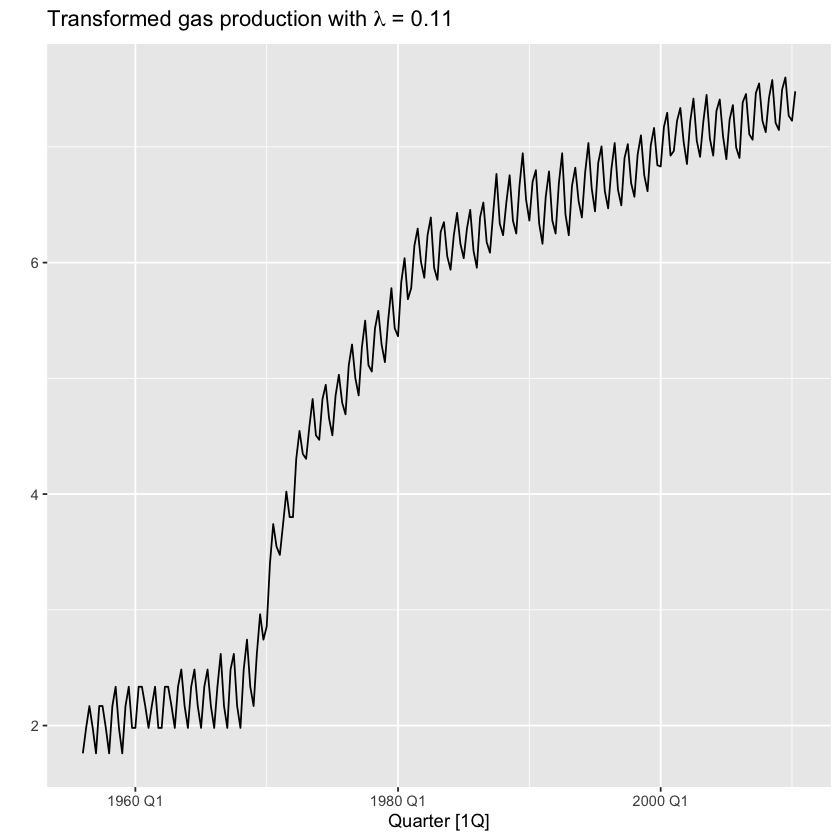

In [37]:
tsibbledata::aus_production %>%
  autoplot(box_cox(Gas, lambda)) +
  labs(
    y = '',
    title = latex2exp::TeX(paste0('Transformed gas production with $\\lambda$ = ', round(lambda, 2)))
  )

---

## Bibliography

Hyndman, Rob J. & George Athanasopoulos. (2021). _Forecasting: Principles and Practice_. 3rd Ed. OTexts. [Home](https://otexts.com/fpp3/).

---